## Лабораторная работа по курсу "Искусственный интеллект"
## Многослойный персептрон

| Студент | Стрыгин |
|---------|--------|
| Группа  | 406      |

Импорт необходимых пакетов/модулей

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
import libperceptron as lp
import normlibperceptron as nlp

#### Формирование выборок
(Использую tensorflow лишь для датасетов)
<br>Используйте Scikit Learn для разбиения данных на обучающую и тестовую выборку</br>

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
cifar_10 = tf.keras.datasets.cifar10
(x_train_fashionMnist, y_train_fashionMnist), (x_test_fashionMnist, y_test_fashionMnist) = fashion_mnist.load_data()
with open('mnist.pkl','rb') as f:
    MNIST = pickle.load(f)
x_mnist = MNIST['Train']['Features']
y_mnist = MNIST['Train']['Labels']
x_train_mnist, x_test_mnist, y_train_mnist, y_test_mnist = train_test_split(x_mnist, y_mnist, train_size = 0.7)
x_train_mnist, x_test_mnist = x_train_mnist.reshape(x_train_mnist.shape[0], 784).astype('float32') / 255.0, x_test_mnist.reshape(x_test_mnist.shape[0], 784).astype('float32') / 255.0
x_train_fashionMnist, x_test_fashionMnist = x_train_fashionMnist.reshape(60000, 784).astype('float32') / 255.0, x_test_fashionMnist.reshape(10000, 784).astype('float32') / 255.0

Функция для отображения графиков

In [3]:
def grafics(model):
    plt.title("Accurancy")
    plt.plot(model[0])
    plt.show()
    plt.title("Loss")
    plt.plot(model[1])
    plt.show()

### Формирования слоя нейронов, инициализация весов

In [4]:
bias = np.arange(0.1, 1.1, 0.1, dtype = 'float32')
weights = np.random.sample((10, 784))
network = lp.MyNeuralNetwork(weights, bias)
network.add_neuron(0, network.weights[0], network.bias[0])
network.add_neuron(0, network.weights[1], network.bias[1])
network.add_neuron(0, network.weights[2], network.bias[2])
network.add_neuron(0, network.weights[3], network.bias[3])
network.add_neuron(0, network.weights[4], network.bias[4])
network.add_neuron(0, network.weights[5], network.bias[5])
network.add_neuron(0, network.weights[6], network.bias[6])
network.add_neuron(0, network.weights[7], network.bias[7])
network.add_neuron(0, network.weights[8], network.bias[8])
network.add_neuron(0, network.weights[9], network.bias[9])

Обучение нейросети

In [5]:
model = network.train(x_train_mnist, y_train_mnist, "nope", 200, 0.5)

Initial accurancy:  0.08371033028334297
Latest accurancy:  0.8850981325895438
Mean Loss:  0.6133897


Отрисовка графиков

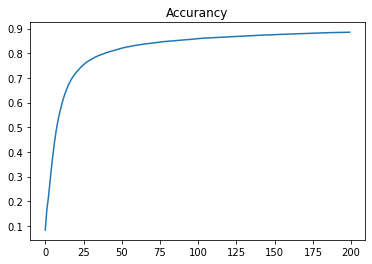

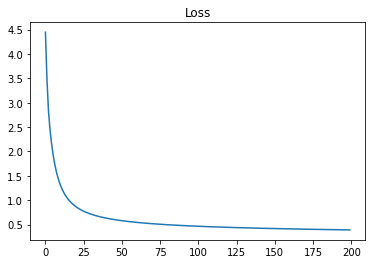

In [6]:
grafics(model)

Результаты тестовой выборки

In [7]:
model = network.test(x_test_mnist, y_test_mnist, "nope")

Test accurancy:  0.8788985001190381


Многослойная сеть

In [8]:
net = nlp.Net()
net.add(nlp.Linear(784, 20))
net.add(nlp.Tanh())
net.add(nlp.Linear(20, 10))
net.add(nlp.Softmax())
loss = nlp.CrossEntropyLoss()

print("Initial loss={}, accuracy={}: ".format(*nlp.get_loss_acc(net, x_train_mnist, y_train_mnist)))
nlp.train_epoch(net, x_train_mnist, y_train_mnist)
print("Final loss={}, accuracy={}: ".format(*nlp.get_loss_acc(net, x_train_mnist, y_train_mnist)))
print("Test loss={}, accuracy={}: ".format(*nlp.get_loss_acc(net, x_test_mnist, y_test_mnist)))

Initial loss=2.30587469186718, accuracy=0.13347392768461513: 
Final loss=0.24609415367946713, accuracy=0.9276846151229634: 
Test loss=0.28094177194797304, accuracy=0.9183398143004523: 


Анализ FashionMnist с активационной функцией Сигмоида

In [9]:
net_FM = nlp.Net()
net_FM.add(nlp.Linear(784, 20))
net_FM.add(nlp.Sigmoid())
net_FM.add(nlp.Linear(20, 10))
net_FM.add(nlp.Softmax())
loss = nlp.CrossEntropyLoss()
print("Initial loss={}, accuracy={}: ".format(*nlp.get_loss_acc(net_FM, x_train_fashionMnist, y_train_fashionMnist)))
nlp.train_epochs(net_FM, x_train_fashionMnist, y_train_fashionMnist, loss, 4, 0.1, 10)
print("Final loss={}, accuracy={}: ".format(*nlp.get_loss_acc(net_FM, x_train_fashionMnist, y_train_fashionMnist)))
print("Test loss={}, accuracy={}: ".format(*nlp.get_loss_acc(net_FM, x_test_fashionMnist, y_test_fashionMnist)))

Initial loss=2.427669126528626, accuracy=0.048683333333333335: 
Final loss=0.3435731387798071, accuracy=0.8756666666666667: 
Test loss=0.42495510737032466, accuracy=0.8532: 
